Markdown: https://colab.research.google.com/drive/1cBhVfPcVte0K-3gG19Vxk1NRtF66N8gQ#scrollTo=uIPGeG3srjBl

**Import Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
health = pd.read_excel('DATA SET A-C.xlsx', sheet_name='Case A_Death of Heart Failure ')

# **Preview Data**

In [ ]:
print('Number of rows:', health.shape[0])
print('Number of colums:', health.shape[1])

Number of rows: 299
Number of colums: 13


Jumlah baris dalam data tersebut adalah 299 dan kolom ada 13 

In [ ]:
health.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak ada data yang kosong

In [ ]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

Data definition:
1. age: age of the patient (years)

2. anaemia: decrease of red blood cells or hemoglobin (boolean)

3. high blood pressure: if the patient has hypertension (boolean)

4. creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)

5. diabetes: if the patient has diabetes (boolean)

6. ejection fraction: percentage of blood leaving the heart at each contraction (percentage)

7. platelets: platelets in the blood (kiloplatelets/mL)

8. sex: woman or man (binary)

9. serum creatinine: level of serum creatinine in the blood (mg/dL)

10. serum sodium: level of serum sodium in the blood (mEq/L)

11. smoking: if the patient smokes or not (boolean)

12. time: follow-up period (days)

13. [target] death event: if the patient deceased during the follow-up period (boolean), 1 = Death, 0 = Alive
Case


In [ ]:
cards.head() #menampilkan bagian data paling atas

index   age  anaemia  ...  smoking  time  DEATH_EVENT
0      0  75.0        0  ...        0     4            1
1      1  55.0        0  ...        0     6            1
2      2  65.0        0  ...        1     7            1
3      3  50.0        1  ...        0     7            1
4      4  65.0        1  ...        0     8            1

[5 rows x 14 columns]

In [ ]:
cards.tail() #menampilkan bagian data paling bawah 

index   age  anaemia  ...  smoking  time  DEATH_EVENT
294    294  62.0        0  ...        1   270            0
295    295  55.0        0  ...        0   271            0
296    296  45.0        0  ...        0   278            0
297    297  45.0        0  ...        1   280            0
298    298  50.0        0  ...        1   285            0

[5 rows x 14 columns]

In [ ]:
health.describe() #memunculkan statistika deskriptif

age     anaemia  ...        time  DEATH_EVENT
count  299.000000  299.000000  ...  299.000000    299.00000
mean    60.833893    0.431438  ...  130.260870      0.32107
std     11.894809    0.496107  ...   77.614208      0.46767
min     40.000000    0.000000  ...    4.000000      0.00000
25%     51.000000    0.000000  ...   73.000000      0.00000
50%     60.000000    0.000000  ...  115.000000      0.00000
75%     70.000000    1.000000  ...  203.000000      1.00000
max     95.000000    1.000000  ...  285.000000      1.00000

[8 rows x 13 columns]

# **Exploratory Data Analysis (EDA)**

**Descriptive Statistics**

In [ ]:
health.groupby('DEATH_EVENT').count() #group berdasarkan decision (berapa banyak yg di masih hidup dan berapa banyak yg meninggal)

age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
DEATH_EVENT                                          ...                    
0            203      203                       203  ...  203      203   203
1             96       96                        96  ...   96       96    96

[2 rows x 12 columns]

Berdasarkan hasil di atas, maka jumlah orang yang masih hidup lebih banyak yaitu itu sebesar 203 dari 299 orang.

In [ ]:
health.groupby('DEATH_EVENT').mean() #rata2 orang yang meninggal berapa yg masih hidup berapa

age   anaemia  ...   smoking        time
DEATH_EVENT                       ...                      
0            58.761906  0.408867  ...  0.325123  158.339901
1            65.215281  0.479167  ...  0.312500   70.885417

[2 rows x 12 columns]

Hasil di atas merupakan rata-rata orang yang masih hidup dan orang yang sudah meninggal dari masing-masing variabel




In [ ]:
health.groupby('DEATH_EVENT').median() #nilai tengah orang yang meninggal berapa yg masih hidup berapa

age  anaemia  creatinine_phosphokinase  ...  sex  smoking   time
DEATH_EVENT                                           ...                     
0            60.0      0.0                     245.0  ...  1.0      0.0  172.0
1            65.0      0.0                     259.0  ...  1.0      0.0   44.5

[2 rows x 12 columns]

Hasil di atas merupakan nilai tengah orang yang masih hidup dan orang yang sudah meninggal dari masing-masing variabel

In [ ]:
health.groupby('DEATH_EVENT').std()

age   anaemia  ...   smoking       time
DEATH_EVENT                       ...                     
0            10.637890  0.492840  ...  0.469579  67.742872
1            13.214556  0.502188  ...  0.465946  62.378281

[2 rows x 12 columns]

Hasil di atas merupakan jumlah sebaran data orang yang masih hidup dan orang yang sudah meninggal dari masing-masing variabel

# **Data Visualization**

model selection (nimbulin untuk explore data tsb dlm segi gambar)

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='age')
plt.show()

Semakin umurnya tua, maka jumlah orang yang sudah meninggal akan semakin banyak. Dan rata-rata orang yang masih hidup berumur 60, sedangkan orang yang sudah meninggal berumur 60 ke atas.

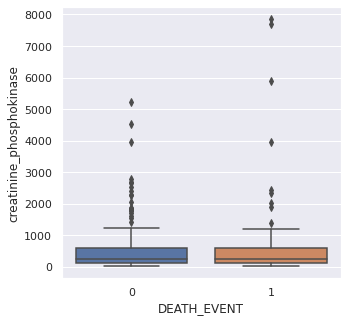

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='creatinine_phosphokinase')
plt.show()

Ada outlier yaitu mendekati 8000. Semakin tinggi nilai CPK maka akan semakin memungkinkan orang tersebut dapat meninggal.Dan apabila nilai CPK (max mencapai 5000) itu masih di katakan bahwa orang itu masih bisa hidup.  CPK paling tinggi adalah 8000, dimana merupakan outlier. Nilai Median antara meninggal dan masih hidup adalah sama. 

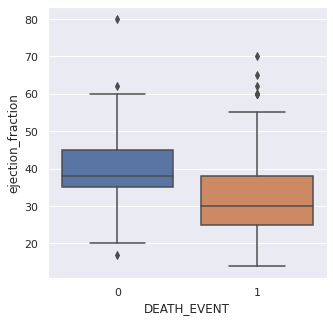

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='ejection_fraction')
plt.show()

Ada outlier yaitu sebesar 80. Semakin tinggi jumlah presentase darah yang meninggalkan jantung pada setiap kontraksi maka semakin mungkin orang tersebut dapat hidup. Jumlah nilai tengah presentase untuk orang yang sudah meninggal adalah 30 %. Maka semakin rendah presentase, akan semakin memungkinkan orang tersebut dapat meninggal.

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='platelets')
plt.show()

Ada outlier yaitu di atas 800000. Semakin tinggi jumlah trombosit dalam darah maka akan semakin memungkinkan orang tersebut dapat hidup. Nilai median antara orang yang masih hidup dan sudah meninggal adalah sama yaitu di atas 200000. 

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='serum_creatinine')
plt.show()

Ada outlier yaitu berada di atas 8. Semakin tinggi tingkat kreatinin serum dalam darah maka akan semakin memungkinkan orang tersebut meninggal. Nilai tengah antara orang yang sudah meninggal dan yang masih hidup pada tingkat kreatinin serum dalam darah adalah mendekati yaitu dibawah 2. 

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='serum_sodium')
plt.show()

Terdapat outlier yaitu mendekati nol dan di atas 145, pada posisi orang yang masih hidup. Semakin tinggi tingkat serum_sodium yang digunakan maka akan semakin memungkinkan orang tersebut dapat hidup. Nilai tengah antara orang yang sudah meninggal dan masih hidup adalah mendekati yaitu di atas 135. 

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=health, x='DEATH_EVENT', y='time')
plt.show()

Semakin lama orang tersebut orang tersebut di rawat, maka akan smakin memungkinkan orang tersebut masih hidup. Karena mereka melakukan tindakan medis dengan waktu yang cukup lama. Sedangkan semakin cepat waktu orang tersebut di rawat, maka akan semakin memungkinkan orang tersebut dapat meninggal dengan cepat. Nilai tengah antara orang yang masih hidup dan yang sudah meninggal perbedaannya sangat jauh. 

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=health, x='anaemia', hue='DEATH_EVENT') #1= anemia #0: not
plt.show()

Jumlah orang yang tidak mengalami penyakit anaemia lebih banyak yaitu sebesar 120 dibandingkan orang yang mengalami, maka menunjukkan bahwa masih banyak orang yang masih hidup. 

In [ ]:
health.groupby('anaemia')['DEATH_EVENT'].value_counts(normalize=True)

anaemia  DEATH_EVENT
0        0              0.705882
         1              0.294118
1        0              0.643411
         1              0.356589
Name: DEATH_EVENT, dtype: float64

Dari hasil presentase, Orang yang tidak mengalami anemia menunjukkan jumlah yang paling banyak yaitu sebesar 0,70, maka orang tersebut masih hidup. Sedangkan orang yang mengalami anemia, presentase terbesar adalah 0,64 yakni menunjukkan bahwa orang tersebut masih hidup. . Maka baik mengalami penyakit maupun tidak, kemungkinann orang tersebut hidup masih ada



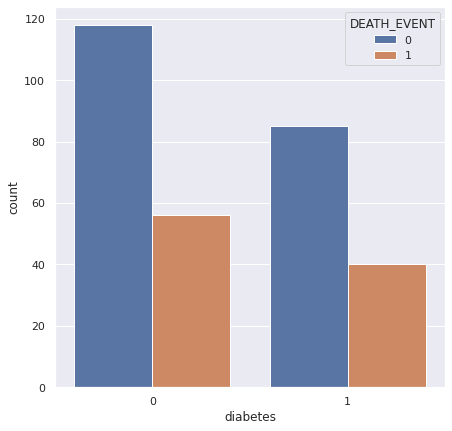

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=health, x='diabetes', hue='DEATH_EVENT') #1= diabetes #0: not
plt.show()

semakin banyak orang yang tidak mengalami penyakit diabtes, semakin banyak orang yang masih hidup 

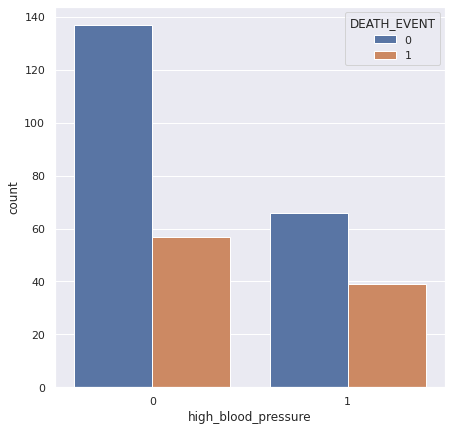

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=health, x='high_blood_pressure', hue='DEATH_EVENT') #1= diabetes #0: not
plt.show()

semakin tidak ada penyakit darah tinggi, maka akan semakin memungkinkan orang tersebut dapat hidup. jumlah terbanyak orang yang masih hidup adalah orang yang tidak mempunyai tekanan darah tinggi 

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=health, x='sex', hue='DEATH_EVENT') #1= diabetes #0: not
plt.show()

sex 0= cewe 1= cowo
jenis kelamin terbanyak yang masih hidup adalah laki-laki, dan jenis kelamin terbanyak orang yang sudah meninggal adalah laki-laki 

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=health, x='smoking', hue='DEATH_EVENT') #1= diabetes #0: not
plt.show()

semakin orang tidak merokok, semakin memungkinkan orang tersebut akan hidup. orang yang banyak merokok akan cenderung dapat mengalami meninggal dunia

In [ ]:
sns.pairplot(data=health,hue='DEATH_EVENT')
plt.show()

In [ ]:
health.corr()

age   anaemia  ...      time  DEATH_EVENT
age                       1.000000  0.088006  ... -0.224068     0.253729
anaemia                   0.088006  1.000000  ... -0.141414     0.066270
creatinine_phosphokinase -0.081584 -0.190741  ... -0.009346     0.062728
diabetes                 -0.101012 -0.012729  ...  0.033726    -0.001943
ejection_fraction         0.060098  0.031557  ...  0.041729    -0.268603
high_blood_pressure       0.093289  0.038182  ... -0.196439     0.079351
platelets                -0.052354 -0.043786  ...  0.010514    -0.049139
serum_creatinine          0.159187  0.052174  ... -0.149315     0.294278
serum_sodium             -0.045966  0.041882  ...  0.087640    -0.195204
sex                       0.065430 -0.094769  ... -0.015608    -0.004316
smoking                   0.018668 -0.107290  ... -0.022839    -0.012623
time                     -0.224068 -0.141414  ...  1.000000    -0.526964
DEATH_EVENT               0.253729  0.066270  ... -0.526964     1.000000

[13 rows x 13 columns]

cara lihat multikolinearitas:
kalo collinearitynya tinggi kecenderungannya saling berkaitan, dan (diabsolute) klomisal <0.04 hubnya semakin kuat. karena lebih dri 40 persen. 50% ada kemiripan. klo yg lain dibawah 40 persen. 

In [ ]:
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(health.corr(), annot=True, fmt='.2%')
plt.show()

NameError: ignored

Pada grafik tersebut, terdapat multikolinearitas dimana jumlah korelsinya lebih dari 40 persen.

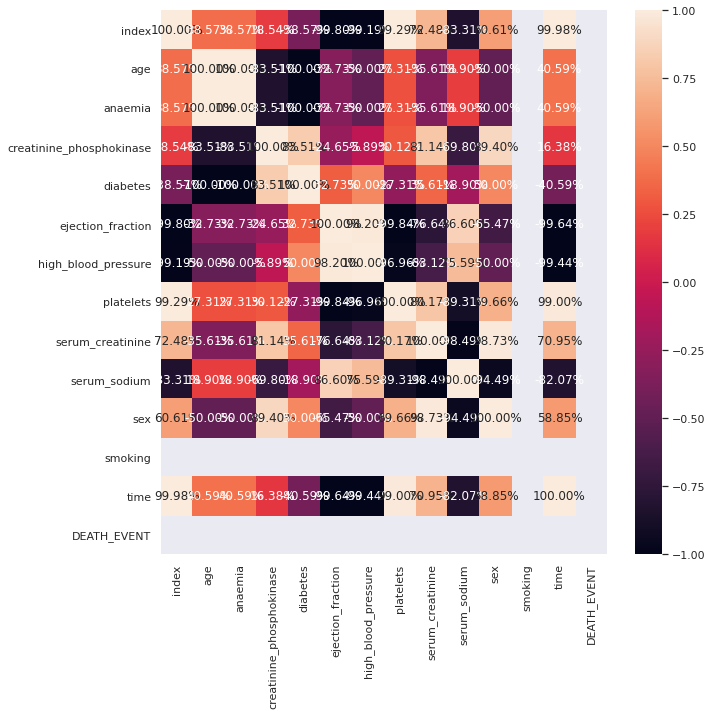

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

# **Modeling**

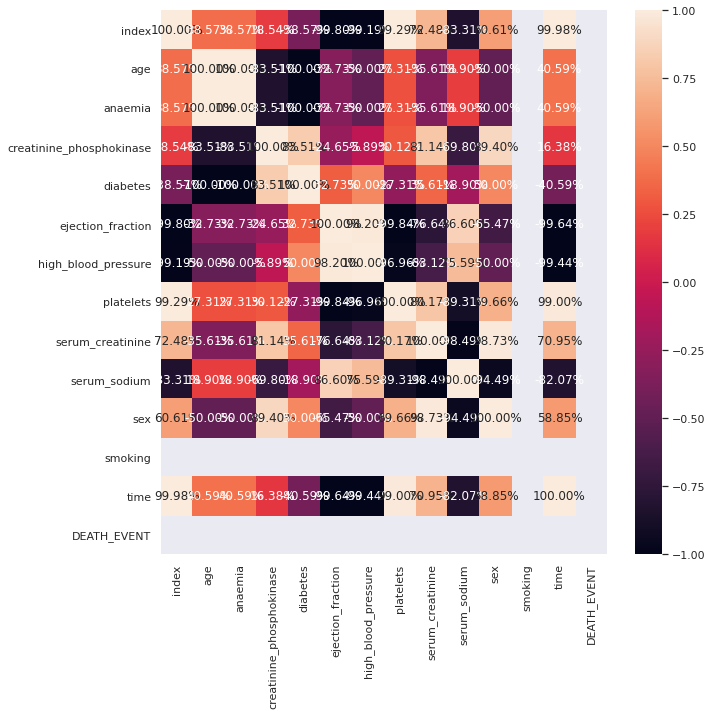

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

In [ ]:
df = cards.copy()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state =11)
train_index = train.index
test_index=train.index

In [ ]:
import statsmodels.api as sm

y_train = train['DEATH_EVENT']
x_train = train[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure', 'platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
X_train = sm.add_constant(x_train)

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  224
Model:                            GLM   Df Residuals:                      211
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -85.191
Date:                Tue, 07 Jul 2020   Deviance:                       170.38
Time:                        06:58:39   Pearson chi2:                     187.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.0909      6.216      1.141      0.254      -5.091      19.273
age                          0.0428      0.018      2.343      0.019       0.007       0.079
anaemia                     -0.1059      0.409     -0.259      0.796      -0.907       0.695
creatinine_phosphokinase     0.0002      0.000      1.010      0.312      -0.000       0.001
diabetes                    -0.1423      0.404     -0.352      0.725      -0.934       0.650
ejection_fraction           -0.0867      0.019     -4.595      0.000      -0.124      -0.050
high_blood_pressure         -0.0697      0.411     -0.170      0.865      -0.876       0.736
platelets                -1.723e-06   2.19e-06     -0.787      0.431   -6.01e-06    2.57e-06
serum_creatinine             0.6367      0.199      3.205      0.001       0.247       1.026
serum_sodium                -0.0398      0.044     -0.907      0.364      -0.126       0.046
sex                         -0.4205      0.493     -0.852      0.394      -1.387       0.546
smoking                     -0.0457      0.466     -0.098      0.922      -0.959       0.868
time                        -0.0179      0.003     -5.510      0.000      -0.024      -0.012
============================================================================================
"""

Variabel yang tidak disignifikan dimana p value> o,o5 yaitu variabel anaemia, CPK, diabetes, high blood, platelets, serum_sodium, sex, dan smoking. Nilai SE pada masing-masing variabel cukup kecil yaitu antara 0 sampai 1. masih tergolong bagus. 

# **Prediction**

In [ ]:
train_pred = logreg.predict(X_train)

We will put the prediction result to the training dataframe as Death_Rate or the probability of applications being death.

In [ ]:
train['Death_Rate'] = train_pred
train.head()

index   age  anaemia  ...  time  DEATH_EVENT  Death_Rate
186    186  50.0        0  ...   172            1    0.036790
184    184  58.0        1  ...   170            1    0.222666
101    101  75.0        0  ...    87            0    0.338467
95      95  58.0        1  ...    83            0    0.045724
210    210  70.0        0  ...   188            0    0.302290

[5 rows x 15 columns]

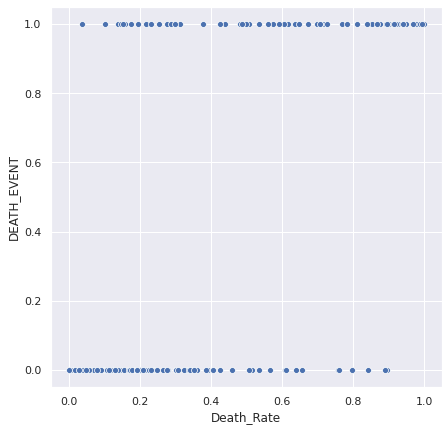

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=train, x='Death_Rate', y='DEATH_EVENT')
plt.show()

Dari hasil tersebut, saya asumsi untuk cut off adalah sebesar 0,7

In [ ]:
fig, ax = plt.subplots(figsize=(11, 11))
train['Data_Index'] = range(1, len(train) + 1)
sns.scatterplot(data=train, x='Data_Index', y='Death_Rate', hue='DEATH_EVENT')
plt.axhline(y = 0.27, color ='green', linestyle =':')
plt.show()

Pada data training, Garis hijau menunjukkan cut off, dimana apabila melewati garis tersebut maka itu merupakan 1 yaitu orang tersebut telah meninggal sedangkan di bawah garis hijau menunjukkan 0 yaitu (orang tersebut masih hidup). Hasil menunjukkan bahwa orang yang masih hidup lebih banyak daripada yang sudah meninggal

In [ ]:
train[['DEATH_EVENT', 'Death_Rate']].groupby('DEATH_EVENT').describe()

Death_Rate                     ...                             
                 count      mean      std  ...      50%       75%       max
DEATH_EVENT                                ...                             
0                154.0  0.177101  0.20231  ...  0.08785  0.248346  0.895476
1                 70.0  0.610377  0.29035  ...  0.66116  0.886796  0.998777

[2 rows x 8 columns]

Cut off value or boundary decision to predict whether an application is approved or declined. Here we choose arbitrarily a value of 0.7 based on the chart above. Jumlah orang yang masih hidup sebesar 154 pada death rate, sedangkan orang yang sudah meninggal sebesar 70.

In [ ]:
cut_off = 0.7
train['Prediction'] = np.where(train['Death_Rate'] < cut_off, 0, 1)
train.head()

index   age  anaemia  ...  Death_Rate  Data_Index  Prediction
186    186  50.0        0  ...    0.036790           1           0
184    184  58.0        1  ...    0.222666           2           0
101    101  75.0        0  ...    0.338467           3           0
95      95  58.0        1  ...    0.045724           4           0
210    210  70.0        0  ...    0.302290           5           0

[5 rows x 17 columns]

Pada data training, Ketika cut off di 0,7 maka hasil prediksinya adalah nol dimana menunjukkan orang itu masih hidup

Confusion matrix

In [ ]:
cm_train = pd.crosstab(train['DEATH_EVENT'], train['Prediction'])
cm_train

Prediction     0   1
DEATH_EVENT         
0            148   6
1             37  33

Pada data training
0 = hidup 1= meninggal 

Jumlah true positif = 148 
prediksi hidup, kenyataan hidup
(jumlah yang terbanyak)

Jumlah False positif = 6 
prediksi meninggal, kenyataan hidup
(menunjukkan paling terkecil)

Jumlah False negatif = 37
prediksi hidup, kenyataan meninggal

Jumlah true negatif = 33
prediksi meninggal, kenyataan meninggal

Jumlah orang yang masih hidup adalah terbanyak daripada jumlah orang yang sudah meninggal



In [ ]:
TN_train = cm_train.iloc[0, 0]
TP_train = cm_train.iloc[1, 1]
FN_train = cm_train.iloc[1, 0]
FP_train = cm_train.iloc[0, 1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train + TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy of training data:', f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy of training data:  80.80%
The model sensitivity of training data:  47.14%
The model precision of training data:  84.62%


Pada data training, nilai presentase sensitivity nya sangat rendah, namun presentase terbesar adalah precision yaitu sebesar 84% dimana proporsi correct positive classification (true positive) from cases that predicted as positive.

**Prediction of Testing Data**

In [ ]:
X_test = test[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure', 'platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

In [ ]:
test['Death_Rate'] = test_pred
test.head()

index   age  anaemia  ...  time  DEATH_EVENT  Death_Rate
69      69  65.0        0  ...    67            1    0.710547
77      77  42.0        0  ...    74            0    0.158949
278    278  50.0        1  ...   246            0    0.041335
254    254  53.0        1  ...   215            0    0.003919
260    260  55.0        0  ...   233            0    0.021571

[5 rows x 15 columns]

In [ ]:
test['Prediction'] = np.where(test['Death_Rate'] < cut_off, 0, 1)
test.head()

index   age  anaemia  ...  DEATH_EVENT  Death_Rate  Prediction
69      69  65.0        0  ...            1    0.710547           1
77      77  42.0        0  ...            0    0.158949           0
278    278  50.0        1  ...            0    0.041335           0
254    254  53.0        1  ...            0    0.003919           0
260    260  55.0        0  ...            0    0.021571           0

[5 rows x 16 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(11, 11))
test['Data_Index'] = range(1, len(test) + 1)
sns.scatterplot(data=test, x='Data_Index', y='Death_Rate', hue='DEATH_EVENT')
plt.axhline(y = 0.27, color ='green', linestyle =':')
plt.show()

Pada data testing, Garis hijau menunjukkan cut off, dimana apabila melewati garis tersebut maka itu merupakan 1 yaitu orang tersebut telah meninggal sedangkan di bawah garis hijau menunjukkan 0 yaitu (orang tersebut masih hidup). Hasil menunjukkan bahwa orang yang masih hidup lebih banyak daripada yang sudah meninggal

In [ ]:
cm_test = pd.crosstab(test['DEATH_EVENT'], test['Prediction'])
cm_test

Prediction    0   1
DEATH_EVENT        
0            47   2
1            10  16

Pada data testing
0 = hidup 1= meninggal 

Jumlah true positif = 47
prediksi hidup, kenyataan hidup
(jumlah yang terbanyak)

Jumlah False positif = 2 
prediksi meninggal, kenyataan hidup
(menunjukkan paling terkecil)

Jumlah False negatif = 10
prediksi hidup, kenyataan meninggal

Jumlah true negatif = 16
prediksi meninggal, kenyataan meninggal

Jumlah orang yang masih hidup adalah terbanyak daripada jumlah orang yang sudah meninggal



In [ ]:
TN_test = cm_test.iloc[0, 0]
TP_test = cm_test.iloc[1, 1]
FN_test = cm_test.iloc[1, 0]
FP_test = cm_test.iloc[0, 1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy of testing data:', f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')


The model accuracy of testing data:  84.00%
The model sensitivity of testing data:  61.54%
The model precision of testing data:  88.89%


Pada data testing, presentase Sensitivity nya rendah yaitu sebesar 61,54%, namun presentase terbesar adalah precision sebesar 88% dimana proporsi correct positive classification (true positive) from cases that predicted as positive.

In [ ]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance1 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

# **Result**

In [ ]:
health = health.loc[health['age'] > 90, :]
health.shape

(3, 13)

Asumsi outlier pada age di atas 90 ke atas ada sebanyak 3 orang dan ada 12 data yang ebrkurang

In [ ]:
health.describe()

age   anaemia  ...       time  DEATH_EVENT
count   3.000000  3.000000  ...   3.000000          3.0
mean   94.666667  0.666667  ...  33.666667          1.0
std     0.577350  0.577350  ...  14.224392          0.0
min    94.000000  0.000000  ...  24.000000          1.0
25%    94.500000  0.500000  ...  25.500000          1.0
50%    95.000000  1.000000  ...  27.000000          1.0
75%    95.000000  1.000000  ...  38.500000          1.0
max    95.000000  1.000000  ...  50.000000          1.0

[8 rows x 13 columns]

Dilihat dari hasil bahwa nilai median (50%) dan mean memiliki perbedaan yang besar, maka perlu dilakukan metode normalisasi untuk scaling data. Variabel yang perlu di scaling adalah Creatinine_Phosphokinase, platelets, Death_event, time 

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['creatinine_phosphokinase', 'platelets','time','DEATH_EVENT']
scaler = StandardScaler()
health.reset_index(inplace=True)
df = health.copy()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.describe()

index        age   anaemia  ...  smoking          time  DEATH_EVENT
count   3.000000   3.000000  3.000000  ...      3.0  3.000000e+00          3.0
mean   37.000000  94.666667  0.666667  ...      0.0  2.220446e-16          0.0
std    15.716234   0.577350  0.577350  ...      0.0  1.224745e+00          0.0
min    26.000000  94.000000  0.000000  ...      0.0 -8.323168e-01          0.0
25%    28.000000  94.500000  0.500000  ...      0.0 -7.031642e-01          0.0
50%    30.000000  95.000000  1.000000  ...      0.0 -5.740116e-01          0.0
75%    42.500000  95.000000  1.000000  ...      0.0  4.161584e-01          0.0
max    55.000000  95.000000  1.000000  ...      0.0  1.406328e+00          0.0

[8 rows x 14 columns]

In [ ]:
variables = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure', 'platelets','serum_creatinine','serum_sodium','sex','smoking','time', 'DEATH_EVENT']

corr_df = df[variables].corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_df, annot=True, fmt='.2%')
plt.show()

Dari di atas terdapat korelasi yang tinggi yaitu variabel serum_creatinine , sex, platetels, high blood, CPK

In [ ]:
health.corr()

index       age  ...      time  DEATH_EVENT
index                     1.000000  0.385727  ...  0.999759          NaN
age                       0.385727  1.000000  ...  0.405887          NaN
anaemia                   0.385727  1.000000  ...  0.405887          NaN
creatinine_phosphokinase  0.185419 -0.835093  ...  0.163803          NaN
diabetes                 -0.385727 -1.000000  ... -0.405887          NaN
ejection_fraction        -0.998046 -0.327327  ... -0.996434          NaN
high_blood_pressure      -0.991870 -0.500000  ... -0.994424          NaN
platelets                 0.992878  0.273060  ...  0.990023          NaN
serum_creatinine          0.724794 -0.356076  ...  0.709495          NaN
serum_sodium             -0.833092  0.188982  ... -0.820749          NaN
sex                       0.606143 -0.500000  ...  0.588537          NaN
smoking                        NaN       NaN  ...       NaN          NaN
time                      0.999759  0.405887  ...  1.000000          NaN
DEATH_EVENT                    NaN       NaN  ...       NaN          NaN

[14 rows x 14 columns]

In [ ]:
from scipy.stats import pearsonr

cval, pval = pearsonr(df['index'], df['DEATH_EVENT'])
print('Correlation:', f'{cval:.2%}')
print('p-value:', f'{pval:.2%}')

Correlation: nan%
p-value: nan%


**Multicolinearity Test**

In [ ]:
features = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure', 'platelets','serum_creatinine','serum_sodium','sex','smoking','time']

X_train = train[features]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X_train.columns
vif_values = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif

Variable        VIF
0                        age  31.417846
1                    anaemia   1.931914
2   creatinine_phosphokinase   1.523352
3                   diabetes   1.945622
4          ejection_fraction  11.823234
5        high_blood_pressure   1.647463
6                  platelets   8.560539
7           serum_creatinine   2.974668
8               serum_sodium  63.893190
9                        sex   4.374374
10                   smoking   2.069609
11                      time   4.692300

In [ ]:
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

Variable        VIF
0               serum_sodium  63.893190
1                        age  31.417846
2          ejection_fraction  11.823234
3                  platelets   8.560539
4                       time   4.692300
5                        sex   4.374374
6           serum_creatinine   2.974668
7                    smoking   2.069609
8                   diabetes   1.945622
9                    anaemia   1.931914
10       high_blood_pressure   1.647463
11  creatinine_phosphokinase   1.523352

Dalam hasil VIF yaitu variabel yang menunjukkan korelasipaling tinggi adalah variabel serum_sodium. VIF> 5% maka multikolinearitas dan harus di remove, yaitu variabel serum_sodium, age, ejection_fraction, platelets yang harus di remove

In [ ]:
from scipy.stats import chi2_contingency
observed = pd.crosstab(index=df['time'], columns=df['DEATH_EVENT'])
chi2, pval, dof, expected = chi2_contingency(observed)
print('Chi-squared:', f'{chi2:,.2f}')
print('p-value:', f'{pval:.2%}')

Chi-squared: 0.00
p-value: 100.00%


variabel tersebut tidak signifikan karena p value sangat besar dari alpha. 

In [ ]:
from scipy.stats import chi2_contingency
observed = pd.crosstab(index=df['serum_creatinine'], columns=df['DEATH_EVENT'])
chi2, pval, dof, expected = chi2_contingency(observed)
print('Chi-squared:', f'{chi2:,.2f}')
print('p-value:', f'{pval:.2%}')

Chi-squared: 0.00
p-value: 100.00%


In [ ]:
from scipy.stats import chi2_contingency
observed = pd.crosstab(index=df['platelets'], columns=df['DEATH_EVENT'])
chi2, pval, dof, expected = chi2_contingency(observed)
print('Chi-squared:', f'{chi2:,.2f}')
print('p-value:', f'{pval:.2%}')

Chi-squared: 0.00
p-value: 100.00%


pada hasil di atas menunjukkan bahwa variabel tersebut tidak signifikan karena p value > 0,05

**Remodeling**

In [ ]:
target = 'DEATH_EVENT'
features = ['creatinine_phosphokinase','anaemia','diabetes','high_blood_pressure','serum_creatinine','sex','smoking','time']

y_train = train[target]
X_train = sm.add_constant(train[features])

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

In [ ]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  224
Model:                            GLM   Df Residuals:                      215
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -102.19
Date:                Tue, 07 Jul 2020   Deviance:                       204.39
Time:                        06:58:42   Pearson chi2:                     221.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0912      0.646      0.141      0.888      -1.174       1.357
creatinine_phosphokinase     0.0003      0.000      1.367      0.172      -0.000       0.001
anaemia                      0.0263      0.362      0.073      0.942      -0.683       0.736
diabetes                    -0.1266      0.357     -0.355      0.723      -0.826       0.572
high_blood_pressure          0.0612      0.365      0.168      0.867      -0.654       0.776
serum_creatinine             0.6444      0.232      2.775      0.006       0.189       1.100
sex                          0.1142      0.422      0.271      0.786      -0.712       0.941
smoking                     -0.1097      0.410     -0.268      0.789      -0.914       0.694
time                        -0.0172      0.003     -5.947      0.000      -0.023      -0.012
============================================================================================
"""

variabel yang tidak signifikan adalah CPK, anaemia, diabetes, high blood, sex, dan smoking karen p value> alpha 
variabel yg disebut harus di remove.

In [ ]:
target = 'DEATH_EVENT'
features = ['serum_creatinine','time']

y_train = train[target]
X_train = sm.add_constant(train[features])

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

In [ ]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  224
Model:                            GLM   Df Residuals:                      221
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -103.49
Date:                Tue, 07 Jul 2020   Deviance:                       206.97
Time:                        06:58:42   Pearson chi2:                     224.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2917      0.446      0.654      0.513      -0.582       1.166
serum_creatinine     0.6294      0.223      2.825      0.005       0.193       1.066
time                -0.0172      0.003     -6.085      0.000      -0.023      -0.012
====================================================================================
"""

pada hasil tersebut menunjukkan bahwa variabel sudah signifikan

In [ ]:
train_pred = logreg.predict(X_train)
train['Death_Rate'] = train_pred
train['DEATH_EVENT'] = np.where(train['Death_Rate'] < cut_off, 0, 1)
train.head()

index   age  anaemia  ...  Death_Rate  Data_Index  Prediction
186    186  50.0        0  ...    0.092479           1           0
184    184  58.0        1  ...    0.133339           2           0
101    101  75.0        0  ...    0.387151           3           0
95      95  58.0        1  ...    0.376620           4           0
210    210  70.0        0  ...    0.090571           5           0

[5 rows x 17 columns]

PAda prediksi menunjukkan bahwa jumlah orang yang masih dhidup lebih banyak daripada jumlah orangyang sudah meninggal

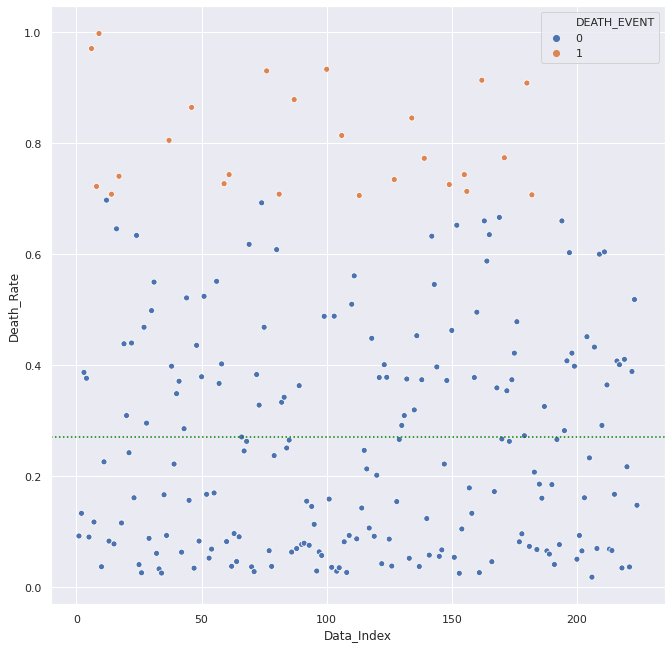

In [ ]:
fig, ax = plt.subplots(figsize=(11, 11))
train['Data_Index'] = range(1, len(train) + 1)
sns.scatterplot(data=train, x='Data_Index', y='Death_Rate', hue='DEATH_EVENT')
plt.axhline(y = 0.27, color ='green', linestyle =':')
plt.show()

Pada data train prediction, Garis hijau menunjukkan cut off 0,27, dimana apabila melewati garis tersebut maka itu merupakan 1 yaitu orang tersebut telah meninggal sedangkan di bawah garis hijau menunjukkan 0 yaitu (orang tersebut masih hidup). Hasil menunjukkan bahwa orang yang masih hidup lebih banyak daripada yang sudah meninggal

# **Comparing Accuracy, Sensitivity, Precision**

In [ ]:
cm_train = pd.crosstab(train['DEATH_EVENT'], train['Prediction'])
cm_train

Prediction     0   1
DEATH_EVENT         
0            180  19
1              5  20

Pada data Training prediction
0 = hidup 1= meninggal 

Jumlah true positif = 180
prediksi hidup, kenyataan hidup
(jumlah yang terbanyak)

Jumlah False positif = 19 
prediksi meninggal, kenyataan hidup

Jumlah False negatif = 5
prediksi hidup, kenyataan meninggal
(menunjukkan paling terkecil)

Jumlah true negatif = 20
prediksi meninggal, kenyataan meninggal

prediksi orang masih hidup, kenyataannya masih hidup
Jumlah orang yang masih hidup adalah terbanyak daripada jumlah orang yang sudah meninggal

In [ ]:
TN_train = cm_train.iloc[0, 0]
TP_train = cm_train.iloc[1, 1]
FN_train = cm_train.iloc[1, 0]
FP_train = cm_train.iloc[0, 1]

accuracy_train = (TN_train + TP_train) / (TN_train + FP_train + FN_train + TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy of training data:', f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy of training data:  89.29%
The model sensitivity of training data:  80.00%
The model precision of training data:  51.28%


Pada data training, nilai presentase precision nya sangat rendah yaitu sebesar 51,28%, namun presentase terbesar adalah accuracy yaitu sebesar 89,29% dimana proporsi correct classifications (true positif and negatif) from overall number of cases. 

In [ ]:
X_test = test[features]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

In [ ]:
test['Death_Rate'] = test_pred
test['DEATH_EVENT'] = np.where(test['Death_Rate'] < cut_off, 0, 1)
test.head()

index   age  anaemia  ...  Death_Rate  Prediction  Data_Index
69      69  65.0        0  ...    0.572778           1           1
77      77  42.0        0  ...    0.444352           0           2
278    278  50.0        1  ...    0.029561           0           3
254    254  53.0        1  ...    0.058954           0           4
260    260  55.0        0  ...    0.043970           0           5

[5 rows x 17 columns]

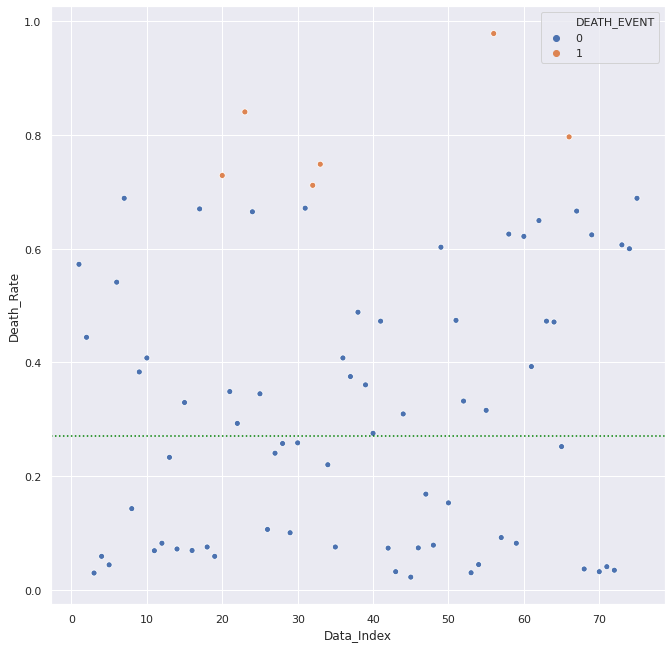

In [ ]:
fig, ax = plt.subplots(figsize=(11, 11))
test['Data_Index'] = range(1, len(test) + 1)
sns.scatterplot(data=test, x='Data_Index', y='Death_Rate', hue='DEATH_EVENT')
plt.axhline(y = 0.27, color ='green', linestyle =':')
plt.show()

Pada data testing prediction, Garis hijau menunjukkan cut off 0,27, dimana apabila melewati garis tersebut maka itu merupakan 1 yaitu orang tersebut telah meninggal sedangkan di bawah garis hijau menunjukkan 0 yaitu (orang tersebut masih hidup). Hasil menunjukkan bahwa orang yang masih hidup lebih banyak daripada yang sudah meninggal

In [ ]:
cm_test = pd.crosstab(test['DEATH_EVENT'], test['Prediction'])
cm_test

Prediction    0   1
DEATH_EVENT        
0            57  12
1             0   6

Pada data Testing prediction
0 = hidup 1= meninggal 

Jumlah true positif = 57
prediksi hidup, kenyataan hidup
(jumlah yang terbanyak)

Jumlah False positif = 12 
prediksi meninggal, kenyataan hidup

Jumlah False negatif = 0
prediksi hidup, kenyataan meninggal
(menunjukkan paling terkecil)

Jumlah true negatif = 6
prediksi meninggal, kenyataan meninggal

prediksi orang masih hidup, kenyataannya masih hidup. Jumlah orang yang masih hidup adalah terbanyak daripada jumlah orang yang sudah meninggal

In [ ]:
TN_test = cm_test.iloc[0, 0]
TP_test = cm_test.iloc[1, 1]
FN_test = cm_test.iloc[1, 0]
FP_test = cm_test.iloc[0, 1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy of testing data:', f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

The model accuracy of testing data:  84.00%
The model sensitivity of testing data:  100.00%
The model precision of testing data:  33.33%


Pada data testing prediction, nilai presentase precision nya sangat rendah yaitu sebesar 33,33%, namun presentase terbesar adalah sensitivity yaitu sebesar 100% dimana proporsi correct positive classifications (true positif and negatif) from cases that are actually positive 

In [ ]:
performance1.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

Jumlah presentase terendah adalah sensitivity , sedangkan yang terbesar pada training data adalah precision yaitu sebesar 84,62% dan testing data adalah precision sebesar 88,89%

In [ ]:
metrics = ['Accuracy', 'Sensitivity', 'Precision']
performance_train = [accuracy_train, sensitivity_train, precision_train]
performance_test = [accuracy_test, sensitivity_test, precision_test]
performance2 = pd.DataFrame({'Metrics': metrics, 'Training Data': performance_train, 'Testing Data': performance_test})
performance2.style.format({'Training Data':'{:,.2%}', 'Testing Data':'{:.2%}'})

Jumlah presentase terendah adalah sensitivity , sedangkan yang terbesar pada training data adalah accuracy yaitu sebesar 89,29% dan testing data adalah sensitivity sebesar 100%. Dimana sensitivity menunjukkan bahwa proporsi of correct positive classifications (true positive) from cases that are actually positive. 

In [ ]:
features = ['serum_creatinine','time']

X_train = sm.add_constant(train[features])

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg = model.fit()

train_pred = logreg.predict(X_train)
train['Death_Rate'] = train_pred
train['DEATH_EVENT'] = np.where(train['Death_Rate'] < cut_off, 0, 1)

X_test = test[features]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

test['Death_Rate'] = test_pred
test['DEATH_EVENT'] = np.where(test['Death_Rate'] < cut_off, 0, 1)

cm_test = pd.crosstab(test['DEATH_EVENT'], test['Prediction'])

TN_test = cm_test.iloc[0, 0]
TP_test = cm_test.iloc[1, 1]
FN_test = cm_test.iloc[1, 0]
FP_test = cm_test.iloc[0, 1]

accuracy_test = (TN_test + TP_test) / (TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy of testing data:', f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

PerfectSeparationError: ignored

In [ ]:
'serum_creatinine','time